In [1]:
import os
from delta.tables import *
from delta import *
from pyspark.sql.functions import *
from pyspark.sql.session import SparkSession
from IPython.display import clear_output
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

builder = SparkSession.builder.appName("MyApp") \
    .config("spark.sql.extensions", "io.delta.sql.DeltaSparkSessionExtension") \
    .config("spark.sql.catalog.spark_catalog", "org.apache.spark.sql.delta.catalog.DeltaCatalog")

spark = configure_spark_with_delta_pip(builder).getOrCreate()
clear_output(wait = True)

if(spark):
    print("Sessão Spark Inicializada com Sucesso!")

Sessão Spark Inicializada com Sucesso!


Atividade 4: Uso dos dados

In [2]:
#Abertura das tabelas geradas pela ETL produzida
df = spark.read.parquet("ml/gold")

#Visualizada na vertical devido a limitações quanto ao tamanho do monitor
df.orderBy("id").show(4, vertical = True)
display(df)

-RECORD 0-----------------------------
 id            | 1                    
 nome_completo | Aleksandr_Crighton   
 email         | acrighton0@instag... 
 valor_pedido  | 71.31                
 data_pedido   | 2021-08-21 14:18:35  
 tipo_cc       | jcb                  
 regiao        | Saitama Prefecture   
 cidade        | Yashio               
 pais          | Japan                
-RECORD 1-----------------------------
 id            | 2                    
 nome_completo | Tad_Arangy           
 email         | tarangy1@studiopr... 
 valor_pedido  | 28.12                
 data_pedido   | 2021-10-28 22:44:27  
 tipo_cc       | maestro              
 regiao        | Santa Fe             
 cidade        | Rosario              
 pais          | Argentina            
-RECORD 2-----------------------------
 id            | 3                    
 nome_completo | Wake_Samart          
 email         | wsamart2@ning.com    
 valor_pedido  | 148.18               
 data_pedido   | 2022-06-

DataFrame[id: int, nome_completo: string, email: string, valor_pedido: double, data_pedido: timestamp, tipo_cc: string, regiao: string, cidade: string, pais: string]

[]

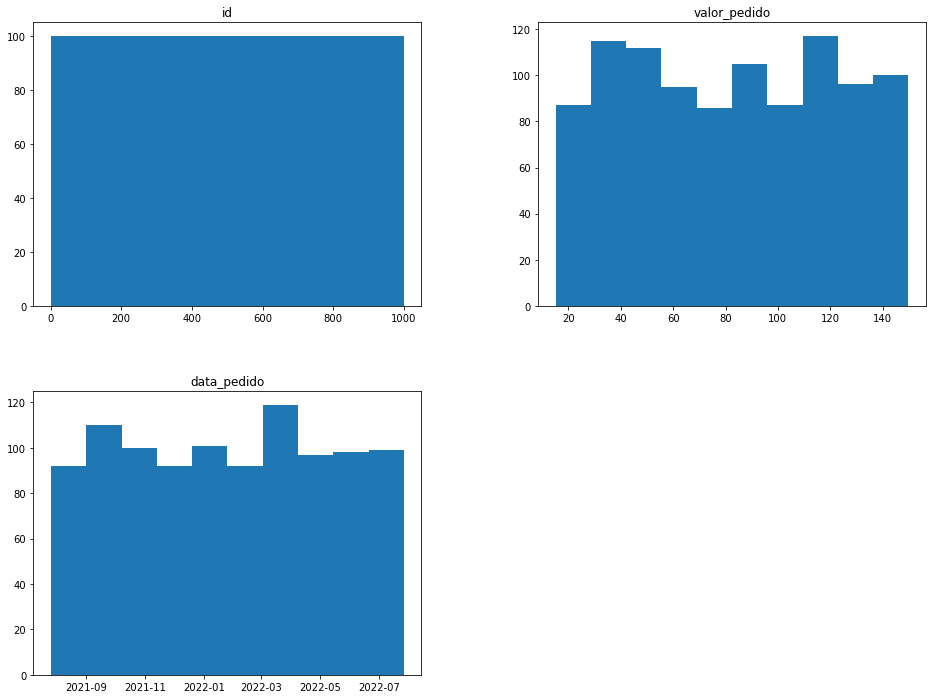

In [3]:
df_pandas = df.toPandas()
df_pandas.hist(figsize=(16,12),grid=False)
plt.title("Dispersão dos dados")
plt.plot()

In [4]:
#Agrupamento dos dados referentes a bandeira dos cartões utilizados e contagem das bandeiras visa e mastercard

mastercard = df.filter(df.tipo_cc == 'mastercard').count()
visa = df.filter(df.tipo_cc == 'visa').count()
df.groupBy('tipo_cc').count().withColumnRenamed("tipo_cc","bandeira_cartao").withColumnRenamed("count","compras").show()

print(f"Total de compras com mastercard: {mastercard}")
print(f"Total de compras com visa: {visa}")

+--------------------+-------+
|     bandeira_cartao|compras|
+--------------------+-------+
|                 jcb|    405|
|       visa-electron|     51|
|             maestro|     77|
|                solo|     17|
|     americanexpress|     56|
| diners-club-enroute|     47|
|      china-unionpay|     48|
|            bankcard|     38|
|              switch|     61|
|          mastercard|     86|
|        instapayment|     16|
|diners-club-carte...|     32|
|                visa|     27|
|               laser|     26|
|   diners-club-us-ca|      6|
|diners-club-inter...|      7|
+--------------------+-------+

Total de compras com mastercard: 86
Total de compras com visa: 27


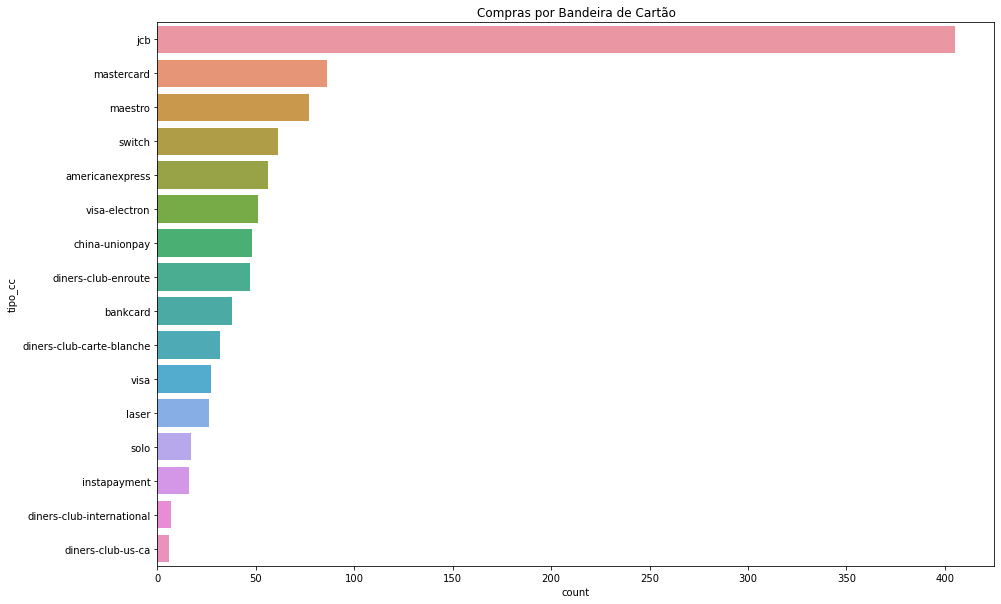

In [5]:
plt.figure(figsize = (15,10))
sns.countplot(y='tipo_cc', data=df_pandas,
              order=df_pandas.tipo_cc.value_counts().index)
plt.title("Compras por Bandeira de Cartão")
plt.show()

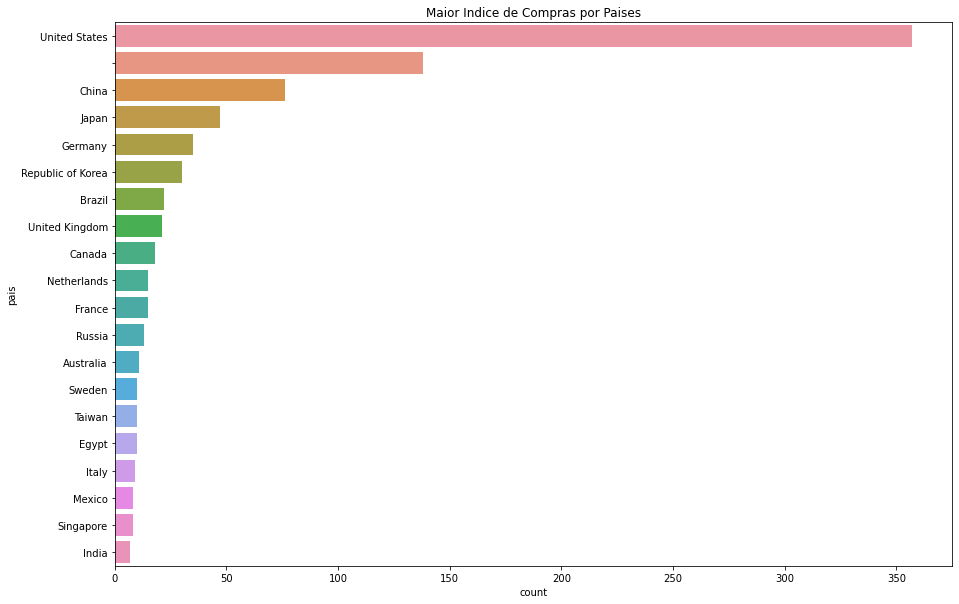

In [6]:
plt.figure(figsize = (15,10))
sns.countplot(y='pais', data=df_pandas,
              order=df_pandas.pais.value_counts().iloc[:20].index)
plt.title("Maior Indice de Compras por Paises")
plt.show()

In [7]:
#Agrupamento das vendas de acordo com o dia de compra
df.groupBy(to_date('data_pedido').alias("data_pedido")).count().withColumnRenamed("count","qtd_pedidos").sort(to_date('data_pedido'), ascending=True).show()

+-----------+-----------+
|data_pedido|qtd_pedidos|
+-----------+-----------+
| 2021-07-27|          4|
| 2021-07-28|          5|
| 2021-07-29|          2|
| 2021-07-30|          2|
| 2021-07-31|          3|
| 2021-08-01|          5|
| 2021-08-02|          2|
| 2021-08-03|          4|
| 2021-08-04|          1|
| 2021-08-05|          1|
| 2021-08-06|          1|
| 2021-08-07|          4|
| 2021-08-08|          3|
| 2021-08-09|          2|
| 2021-08-10|          2|
| 2021-08-11|          2|
| 2021-08-12|          2|
| 2021-08-14|          3|
| 2021-08-16|          2|
| 2021-08-17|          3|
+-----------+-----------+
only showing top 20 rows



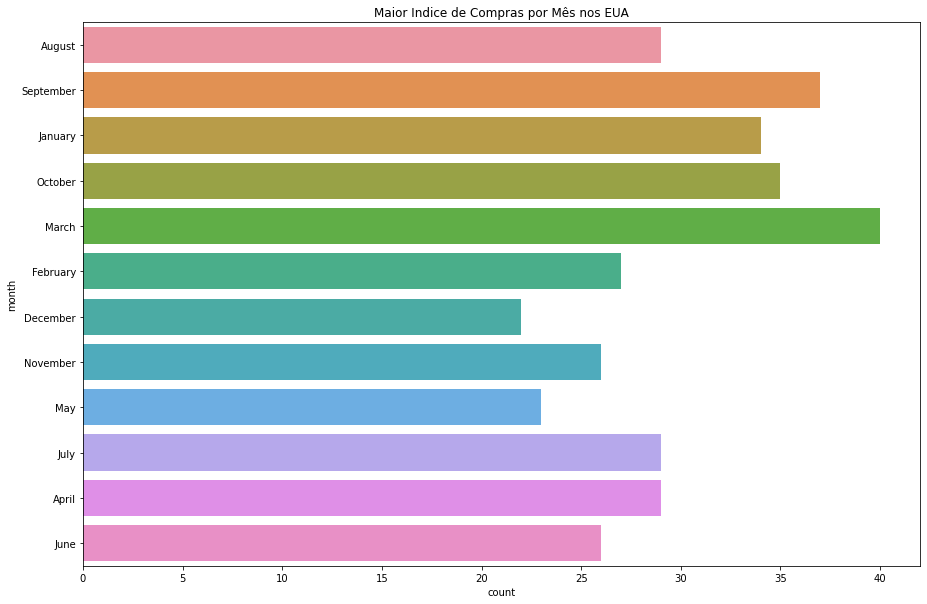

In [8]:
df_pandas['data_pedido'] = pd.to_datetime(df_pandas['data_pedido'])
df1 = df_pandas.copy()
df1['month'] = df_pandas['data_pedido'].dt.month_name()


plt.figure(figsize = (15,10))
sns.countplot(y='month', data=df1.loc[df1['pais'] == "United States"])
plt.title("Maior Indice de Compras por Mês nos EUA")
plt.show()